### Student Name: Ash Hoskins,#S559245
### Course: CSIS 44-609 - Data Analytics Fundamentals
### Professor Denise Case
### Domain: Geospatial Data Module 7 Task 3 Project Date: 2/27/2023

In [139]:
### Task 3 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#### Steps 1 to 17 task 3

In [140]:
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range (0, 101, 10)]

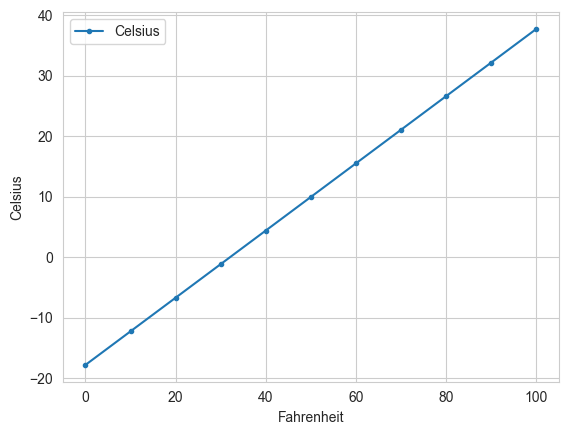

In [141]:
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x = 'Fahrenheit', y='Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

In [142]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [143]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [144]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [145]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [146]:
nyc.Date = nyc.Date.floordiv(100)
pd.set_option('display.precision', 2)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [147]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [148]:

LR = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [149]:
LR.slope

0.014771361132966163

In [150]:
LR.intercept

8.694993233674289

In [151]:
LR.slope * 2026 + LR.intercept

38.62177088906374

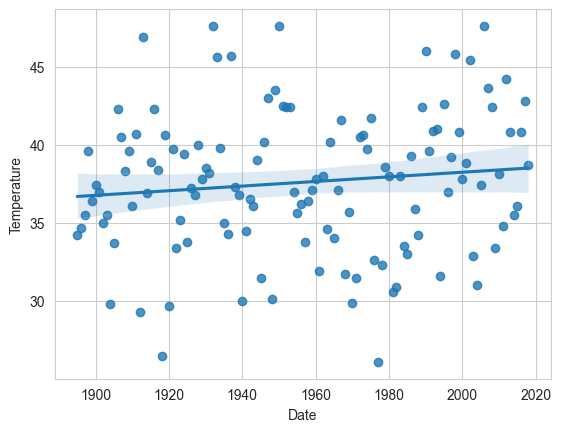

In [152]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [153]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [154]:
year = 2019
slope = LR.slope
intercept = LR.intercept
temp = slope * year + intercept

while temp < 40:
    year += 1
    temp = slope * year + intercept

year

2120

### Steps 18 to 22 Task 3

In [155]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']


In [156]:
nyc.Date = nyc.Date.floordiv(100)

In [157]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [158]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [159]:
X_train.shape

(93, 1)

In [160]:
X_test.shape

(31, 1)

In [161]:
LR = LinearRegression()
LR.fit(X=X_train, y=y_train)

LinearRegression()

In [162]:
LR.coef_

array([0.01939167])

In [163]:
LR.intercept_

-0.30779820252656975

In [164]:
predicted = LR.predict(X_test)
expected = y_test

In [165]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [166]:
predict = (lambda x: LR.coef_ * x + LR.intercept_)

predict(2019)

array([38.84399018])

In [167]:
predict(1890)

array([36.34246432])

(10.0, 70.0)

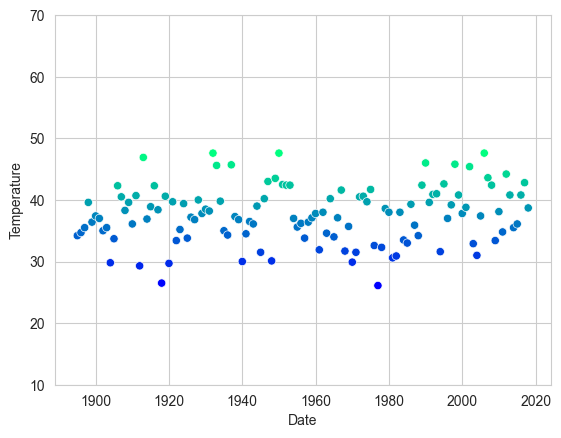

In [168]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue = 'Temperature', palette ='winter', legend= False)
axes.set_ylim(10,70)

In [169]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

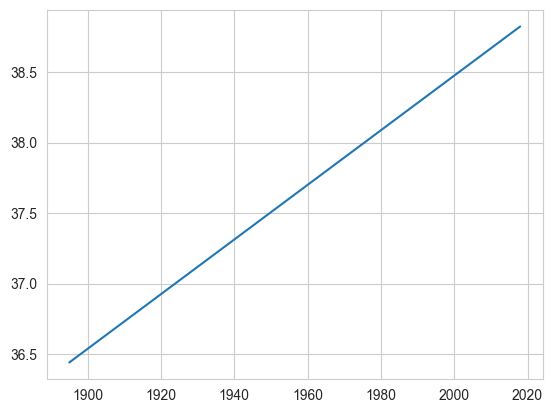

In [170]:
line = plt.plot(x, y)